In [1]:
import csv
import networkx as nx
from operator import itemgetter
from networkx.algorithms import community
#from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
a=pd.read_table("AROs_file.csv", sep=",")

In [3]:
df = pd.read_csv('AROs_file.csv', index_col=0, nrows=10)
df['AROs'] = df['AROs'].str.split(',')
df = df.set_index('Genome_Bin')
df

,AROs
Genome_Bin,
GMBC10.059_230,"[ARO:1000001, ARO:3000000, ARO:3000012, ARO:30..."
GMBC10.065_422,"[ARO:1000001, ARO:3000000, ARO:3000012, ARO:30..."
GMBC10.069_549,"[ARO:1000001, ARO:3000000, ARO:3000012, ARO:30..."
GMBC10.077_233,"[ARO:1000001, ARO:3000000, ARO:3000012, ARO:30..."
GMBC10.086_415,"[ARO:1000001, ARO:3000000, ARO:3000012, ARO:30..."
GMBC10.100_306,"[ARO:1000001, ARO:3000000, ARO:3000012, ARO:30..."
GMBC10.113_359,"[ARO:1000001, ARO:3000000, ARO:3000012, ARO:30..."
GMBC10.125_231,"[ARO:1000001, ARO:3000000, ARO:3000012, ARO:30..."
GMBC10.128_202,"[ARO:1000001, ARO:3000000, ARO:3000012, ARO:30..."


In [4]:
adj_m = pd.DataFrame(index=df.index, columns=df.index)
for genome_bin_i, aros_i in df.iterrows():
    for genome_bin_j, aros_j in df.iterrows():
        aros_i = aros_i[0]
        aros_j = aros_j[0]
        # print(genome_bin_i)
        # print(set([type(aro) for aro in aros_i]))
        # print(genome_bin_j)
        # print(set([type(aro) for aro in aros_j]))
        adj_m.loc[genome_bin_i, genome_bin_j] = len(set(aros_i).intersection(set(aros_j)))
adj_m

Genome_Bin,GMBC10.059_230,GMBC10.065_422,GMBC10.069_549,GMBC10.077_233,GMBC10.086_415,GMBC10.100_306,GMBC10.113_359,GMBC10.125_231,GMBC10.128_202,GMBC10.129_494
Genome_Bin,,,,,,,,,,
GMBC10.059_230,8,0,0,0,0,0,0,0,0,0
GMBC10.065_422,8,0,0,0,0,0,0,0,0,0
GMBC10.069_549,8,0,0,0,0,0,0,0,0,0
GMBC10.077_233,8,0,0,0,0,0,0,0,0,0
GMBC10.086_415,8,0,0,0,0,0,0,0,0,0
GMBC10.100_306,8,0,0,0,0,0,0,0,0,0
GMBC10.113_359,8,0,0,0,0,0,0,0,0,0
GMBC10.125_231,8,0,0,0,0,0,0,0,0,0
GMBC10.128_202,8,0,0,0,0,0,0,0,0,0


Network density: 1.2222222222222223


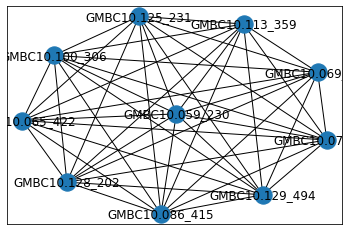

In [5]:
G = nx.Graph()
for genome_bin_i, aros_i in df.iterrows():
    for genome_bin_j, aros_j in df.iterrows():
        aros_i = aros_i[0]
        aros_j = aros_j[0]
        # print(genome_bin_i)
        # print(set([type(aro) for aro in aros_i]))
        # print(genome_bin_j)
        # print(set([type(aro) for aro in aros_j]))
        num_overlap_aros = len(set(aros_i).intersection(set(aros_j)))
        G.add_edge(genome_bin_i, genome_bin_j, weight=num_overlap_aros)
density = nx.density(G)
print("Network density:", density)
nx.draw_networkx(G, with_labels=True)

In [11]:
#plt.show(block=False)
plt.savefig("poiyui.png", dpi=300, bbox_inches='tight')
plt.show()


<Figure size 432x288 with 0 Axes>

Network density: 1.2222222222222223


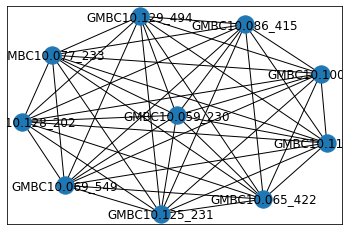

In [15]:
G = nx.Graph()
for genome_bin_i, aros_i in df.iterrows():
    for genome_bin_j, aros_j in df.iterrows():
        aros_i = aros_i[0]
        aros_j = aros_j[0]
        # print(genome_bin_i)
        # print(set([type(aro) for aro in aros_i]))
        # print(genome_bin_j)
        # print(set([type(aro) for aro in aros_j]))
        num_overlap_aros = len(set(aros_i).intersection(set(aros_j)))
        G.add_edge(genome_bin_i, genome_bin_j, weight=num_overlap_aros)
density = nx.density(G)
print("Network density:", density)
nx.draw_networkx(G, with_labels=True)
plt.savefig("poiyui.png", dpi=200, bbox_inches='tight')
plt.show()